In [1]:
import os
import pandas
import numpy
import matplotlib.pyplot as plt

#### **Modelagem de Dispersão Gaussiano**



O sistema de referência da malha é a chaminé (0,0)

Função do Modelo Gaussiano 

In [62]:
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    term1 = qs/(2*numpy.pi*sigmaY*sigmaZ*u)
    term2 = numpy.exp((-(y)**2)/(2*(sigmaY)**2))
    term3 = numpy.exp((-(z-H)**2)/(2*(sigmaZ)**2)) + numpy.exp((-(z+H)**2)/(2*(sigmaZ)**2))
    result = term1*term2*term3
    return result*(10**6)

Função da estimativa de dispersão lateral e vertical da pluma


In [63]:
def dispersion(x,classe,type):

    if type == 'rural':

        if classe == 'A' or classe == 'B':

            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.24*(1+0.001*x)**(0.5)

    elif type == 'urbano':

        if classe == 'A':

            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.20*x
        
    return sigmaY, sigmaZ

Altura efetiva lançada pela chaminé 

**Implementar BRIGS inves dessa**

In [64]:
def height_effectiv(d,vs,u,Ts,Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Ts)
    return deltaH

Coordenadas **x-y** da malha bidimensional

In [65]:
x = numpy.linspace(-100,1000,500)
y = numpy.linspace(-100,1000,500)
xx,yy = numpy.meshgrid(x,y)

Fatores de dispersão

In [66]:
qs = 100 #g/s
u = 10 #m/s
y = 0 #direção do vento
z = 1.5 #m
hg = 150 #m
sigmaY = 10 #m
sigmaZ = 15 #m

#Criar função para determinar a classe de vulnerabilidade pela velocidade do vento e radiação (Aula de meteorologia)

In [67]:
classe = 'A'
type = 'urbano'
d = 1 #m
vs = 15 #m/s
Ts = 300 #K
Tamb = 293 #K

In [68]:
if vs > 1.5*u:
    deltaH = height_effectiv(d,vs,u,Ts,Tamb)
    hef = deltaH + hg
    print('A pluma subiu!')
else:
    hef = hg + 2*d*((vs/u)-1.5)
    print('A pluma caiu!')

A pluma caiu!


In [69]:
sigmaY, sigmaZ = dispersion(xx,classe,type)
deltaH = height_effectiv(d,vs,u,Ts,Tamb)
results = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,hef)
results

array([[1.84151722e-13, 3.38783560e-14, 5.52719495e-15, ...,
        5.13854377e+01, 5.12526273e+01, 5.11200748e+01],
       [2.87634891e-13, 5.40085397e-14, 9.00619334e-15, ...,
        5.16428417e+01, 5.15082815e+01, 5.13739931e+01],
       [4.44826431e-13, 8.52094908e-14, 1.45161519e-14, ...,
        5.18957549e+01, 5.17594701e+01, 5.16234709e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.72083548e-04, 7.02875572e-04, 7.34850700e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.39077084e-04, 6.68498739e-04, 6.99057369e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.07623910e-04, 6.35732727e-04, 6.64934029e-04]])

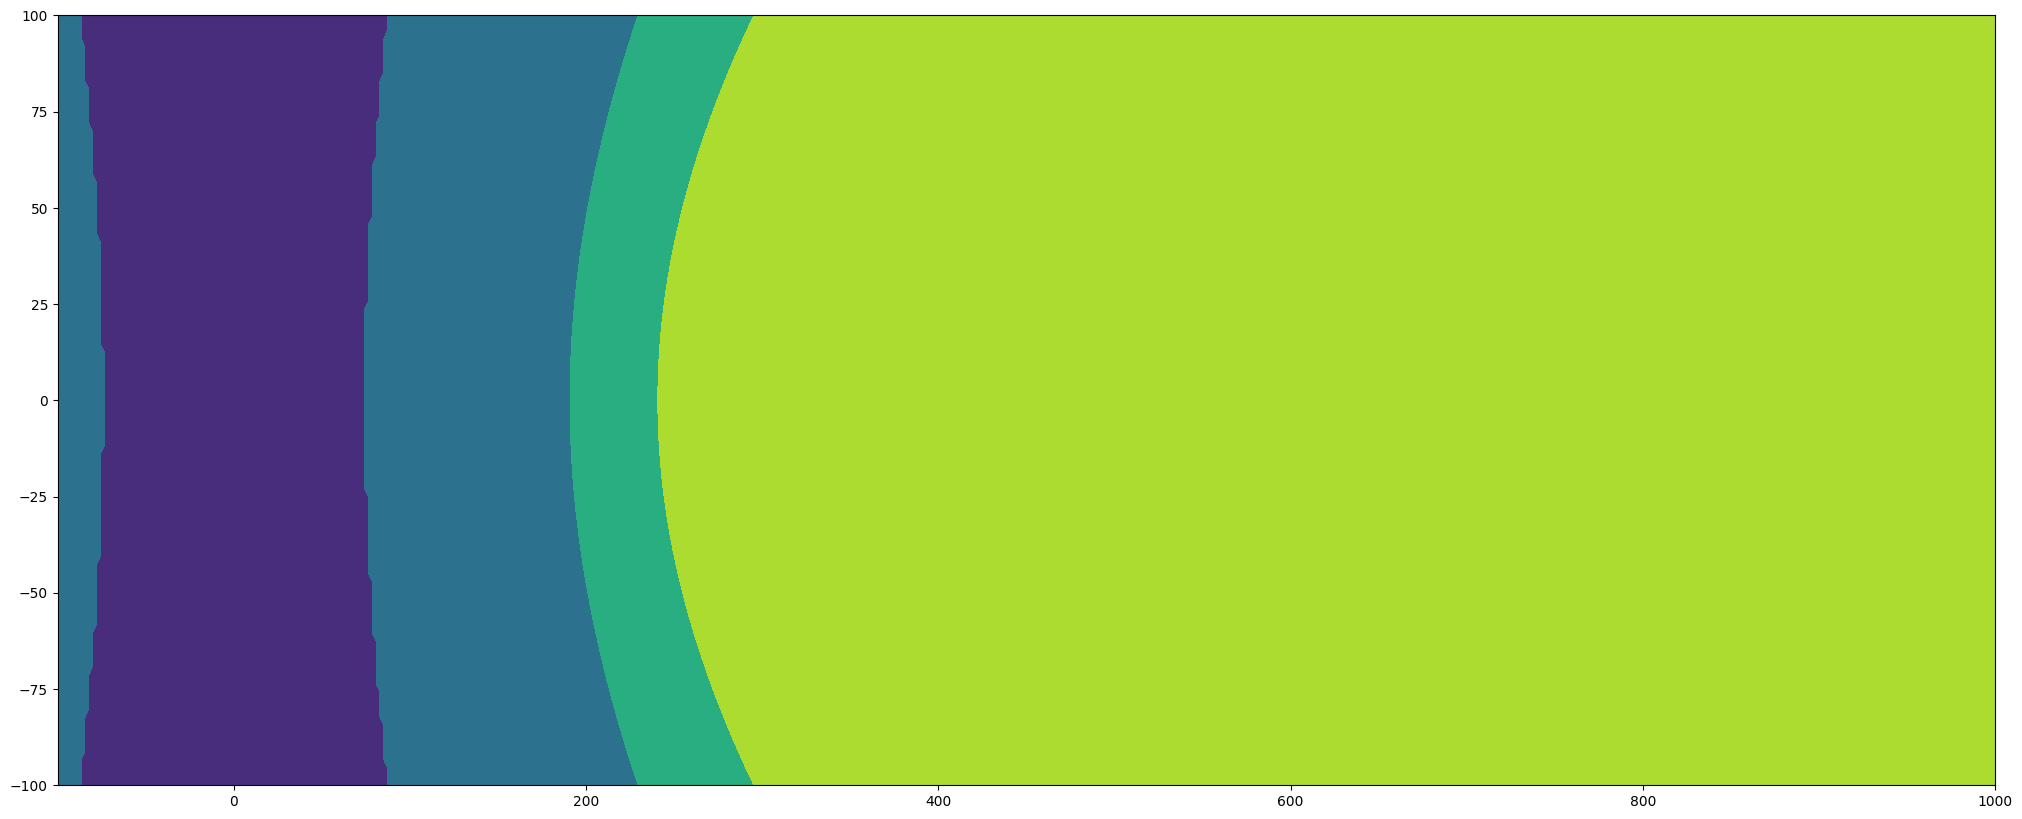

In [76]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(25,10))
plt.rc('Montserrat')
ax.contourf(xx,yy,results+0.1,norm=LogNorm())
ax.set_ylim(bottom=-100,top=100)
ax.set_xlim(left=-100,right=1000)
plt.show()

#### **Parte 2**



- Aermet: recebe dados de sondagens, meteorologia de superfície e uso do solo. Processamento da turbulência e formato o arquivo
- Aermap: recebe domínio/grade e topografia. Processamento da topografia, inclinação e formato de arquivo.
- Aermod: armet + aermap + fonte de emissão. 

**Topografia (E-Z Airmap)**

Escolher número de receptores.
- Nrecept x: Definir.

Calculo o espaçamento
- Delta x: DELTAX = LARGURA/(Nrecept - 1)

Simular até que nao acontece impacto, vários tamanhos de chaminé